# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install openweathermapy
!pip install citipy

In [2]:
# Dependencies and Setup

from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['busselton',
 'provideniya',
 'mahebourg',
 'tasiilaq',
 'waingapu',
 'sibolga',
 'cape town',
 'rikitea',
 'kalmar',
 'fortuna',
 'geraldton',
 'butler',
 'harrison',
 'balykshi',
 'chuy',
 'lafia',
 'caravelas',
 'bowen',
 'avera',
 'upata',
 'lompoc',
 'umzimvubu',
 'panaba',
 'puerto ayora',
 'saint-philippe',
 'pisco',
 'hilo',
 'bluff',
 'port hedland',
 'atuona',
 'kirovskiy',
 'ushuaia',
 'eirunepe',
 'humboldt',
 'san cristobal',
 'qaanaaq',
 'lata',
 'punta arenas',
 'kavaratti',
 'bambous virieux',
 'concordia',
 'jamestown',
 'tuktoyaktuk',
 'nieuw nickerie',
 'ambunti',
 'hermanus',
 'wewak',
 'samusu',
 'bonnyville',
 'bilma',
 'axim',
 'hobart',
 'saskylakh',
 'tecoanapa',
 'hambantota',
 'port elizabeth',
 'ixtapa',
 'mar del plata',
 'riverton',
 'barrow',
 'mataura',
 'cherskiy',
 'peachland',
 'muros',
 'olafsvik',
 'butaritari',
 'portales',
 'castro',
 'barentsburg',
 'kapaa',
 'aurillac',
 'east london',
 'ribeira grande',
 'arraial do cabo',
 'inderborskiy',
 'k

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

city_name = []
cloudiness = []
country = []
humidity = []
lat = []
max_temp = []
wind_speed = []

counter = 1

for city in cities:  
    
    try: 
        response = requests.get(f"{base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        print(f"{base_url}&q={city}")
        
        counter= counter + 1

    except:
            print("City not found. Skipping...")
            continue

Processing Record 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=busselton
Processing Record 2 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=provideniya
Processing Record 3 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=mahebourg
Processing Record 4 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=tasiilaq
Processing Record 5 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=waingapu
Processing Record 6 | Sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=sibolga
Processing Record 7 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q

Processing Record 58 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=mataura
Processing Record 59 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=cherskiy
Processing Record 60 | Peachland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=peachland
Processing Record 61 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=muros
City not found. Skipping...
Processing Record 62 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=butaritari
Processing Record 63 | Portales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=portales
Processing Record 64 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30c

Processing Record 113 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=sambava
Processing Record 114 | Nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=nicoya
City not found. Skipping...
Processing Record 115 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kirakira
Processing Record 116 | West Fargo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=west fargo
Processing Record 117 | Nosy Varika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=nosy varika
Processing Record 118 | Conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=conakry
Processing Record 119 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 168 | Liberal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=liberal
Processing Record 169 | Asprovalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=asprovalta
Processing Record 170 | Rurrenabaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=rurrenabaque
Processing Record 171 | Tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=tual
Processing Record 172 | Allingabro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=allingabro
Processing Record 173 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bilibino
Processing Record 174 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5

Processing Record 224 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=huarmey
Processing Record 225 | Gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=gushikawa
Processing Record 226 | Kayerkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kayerkan
Processing Record 227 | Ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=ornskoldsvik
Processing Record 228 | Waitati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=waitati
Processing Record 229 | Lunino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=lunino
Processing Record 230 | Maningrida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d

Processing Record 279 | Bratskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=bratskoye
Processing Record 280 | Pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=pimentel
City not found. Skipping...
Processing Record 281 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=amapa
Processing Record 282 | Honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=honningsvag
City not found. Skipping...
Processing Record 283 | Havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=havoysund
Processing Record 284 | Camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=camopi
City not found. Skipping...
Processing Record 285 | Saint Anthony
http://a

Processing Record 334 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=lagoa
Processing Record 335 | Englehart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=englehart
Processing Record 336 | Asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=asuncion
Processing Record 337 | Dong Hoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=dong hoi
Processing Record 338 | Cukai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=cukai
Processing Record 339 | Najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=najran
Processing Record 340 | Botevgrad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=botevgr

Processing Record 389 | Surovatikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=surovatikha
Processing Record 390 | Chitral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=chitral
Processing Record 391 | Darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=darhan
Processing Record 392 | Capitao Poco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=capitao poco
Processing Record 393 | Presidente Venceslau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=presidente venceslau
City not found. Skipping...
Processing Record 394 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=namibe
Processing Record 395 | Varhaug
http://api.openweathermap.org/data/2.5/wea

Processing Record 444 | Kibre Mengist
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kibre mengist
City not found. Skipping...
Processing Record 445 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=kulhudhuffushi
Processing Record 446 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=imbituba
Processing Record 447 | Monroe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=monroe
Processing Record 448 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=yulara
Processing Record 449 | Aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=aripuana
Processing Record 450 | Merauke
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 499 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=nantucket
Processing Record 500 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=winnemucca
Processing Record 501 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=meulaboh
Processing Record 502 | Manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=manono
Processing Record 503 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=komsomolskiy
Processing Record 504 | Fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e7df&q=fukue
Processing Record 505 | Mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=13d1cf66a30cab63715a43a5d383e

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}


weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City          542
Cloudiness    542
Country       542
Humidity      542
Lat           542
Max Temp      542
Wind Speed    542
dtype: int64

In [6]:
weather_data.to_csv("Weather_Data_Output.csv")
weather_data.head()

,City,Cloudiness,Country,Humidity,Lat,Max Temp,Wind Speed
0,Busselton,20,AU,25,-33.64,75.00,11.21
1,Provideniya,0,RU,91,64.42,26.09,13.33
2,Mahebourg,75,MU,79,-20.41,84.20,11.41
3,Tasiilaq,88,GL,100,65.61,19.61,22.50
4,Waingapu,68,ID,98,-9.65,80.59,2.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

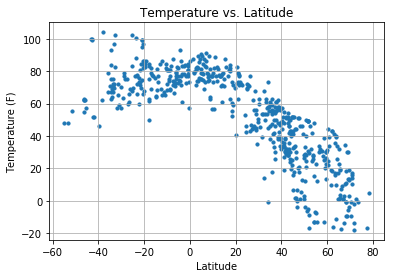

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Temperature_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

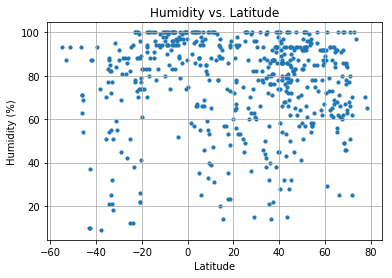

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humididty_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

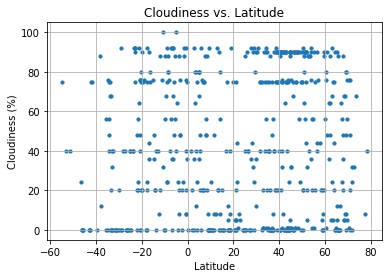

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

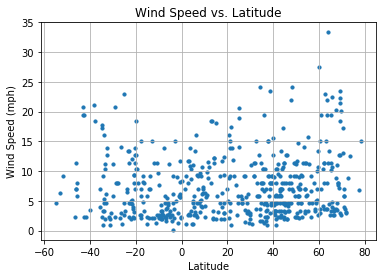

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()